In [32]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass (1).csv


DATA PROCESSING

In [34]:
import pandas as pd
import numpy as np
#pd.options.display.float_format = '{:.3f}'.format

In [35]:
Glass_data = pd.read_csv("glass.csv")
Glass_data.shape

(214, 10)

In [36]:
Glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [38]:
Glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [39]:
Glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# split as X and Y

In [40]:
Y = Glass_data["Type"]

In [41]:
X = Glass_data.iloc[:,0:9]
list(X)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# standardization

In [42]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler().fit_transform(X)
X_scale
type(X_scale)

numpy.ndarray

In [43]:
'''z = pd.DataFrame(X_scale)
z[0].describe()

z[10].describe()
z[10].hist()
'''

'z = pd.DataFrame(X_scale)\nz[0].describe()\n\nz[10].describe()\nz[10].hist()\n'

In [44]:
pd.crosstab(Y,Y)

Type,1,2,3,5,6,7
Type,,,,,,
1,70,0,0,0,0,0
2,0,76,0,0,0,0
3,0,0,17,0,0,0
5,0,0,0,13,0,0
6,0,0,0,0,9,0
7,0,0,0,0,0,29


In [45]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y,stratify=Y ,random_state=50)  # By default test_size=0.25

In [46]:
pd.crosstab(Y_train,Y_train)

Type,1,2,3,5,6,7
Type,,,,,,
1,52,0,0,0,0,0
2,0,57,0,0,0,0
3,0,0,13,0,0,0
5,0,0,0,10,0,0
6,0,0,0,0,7,0
7,0,0,0,0,0,21


In [47]:
X_train.shape

(160, 9)

# Install KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17, p=2) # k =5 # p=2 --> Eucledian distance
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=17)

# Prediction

In [49]:
Y_pred_train=knn.predict(X_train)
Y_pred_test=knn.predict(X_test)

# Compute confusion matrix

In [51]:
from sklearn.metrics import accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

In [52]:
accuracy_score(Y_train, Y_pred_train)
print('Accuracy of KNN with K=5, on the test set: {:.3f}'.format(accuracy_score(Y_train, Y_pred_train)))

Accuracy of KNN with K=5, on the test set: 0.681


In [53]:
accuracy_score(Y_test, Y_pred_test)
print('Accuracy of KNN with K=5, on the test set: {:.3f}'.format(accuracy_score(Y_test, Y_pred_test)))

Accuracy of KNN with K=5, on the test set: 0.630


In [54]:
#print('Accuracy of KNN with K=5, on the test set: {:.3f}'.format(knn.score(X_test, y_test)))

In [55]:
'''
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred).round(3)

knn.score(X_test, y_test).round(3)
# try with different k value and see where you get highest score
# that k value is final.
'''

'\nfrom sklearn.metrics import accuracy_score\naccuracy_score(y_test,y_pred).round(3)\n\nknn.score(X_test, y_test).round(3)\n# try with different k value and see where you get highest score\n# that k value is final.\n'

In [56]:
k_num = range(1,15,1)
Test_accuracy = []

In [57]:
for i in k_num:
    knn = KNeighborsClassifier(n_neighbors=i, p=2) # k =5 # p=2 --> Eucledian distance
    knn.fit(X_train, Y_train)
    Y_pred=knn.predict(X_test)
    Test_accuracy.append(accuracy_score(Y_test, Y_pred).round(3))

In [58]:
print(Test_accuracy)

[0.741, 0.685, 0.704, 0.667, 0.667, 0.667, 0.63, 0.611, 0.63, 0.648, 0.648, 0.667, 0.648, 0.667]


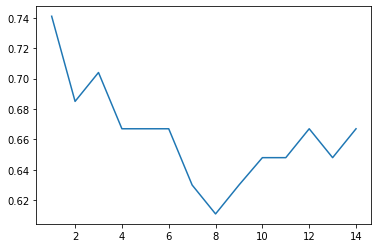

In [59]:
import matplotlib.pyplot as plt
plt.plot(k_num,Test_accuracy)
plt.show()

# evaluate using cross validation

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Kfold=KFold(n_splits=5,random_state=7,shuffle=True)
KFold()
kmodel=KNeighborsClassifier(n_neighbors=10)
KNeighborsClassifier()
results=cross_val_score(kmodel,X,Y,cv=Kfold,scoring="accuracy")
results
acc=(results.mean()*100.0).round(2)
print("Accuracy score is",acc)

Accuracy score is 64.47


RESUTS

In [62]:
# accuracy_score(Y_train, Y_pred_train
# Accuracy of KNN with K=5, on the test set: 0.681
 
# accuracy_score(Y_test, Y_pred_test) 
# accuracy_score(Y_test, Y_pred_test)

# print(Test_accuracy)
# [0.741, 0.685, 0.704, 0.667, 0.667, 0.667, 0.63, 0.611, 0.63, 0.648, 0.648, 0.667, 0.648, 0.667]
